In [1]:
import numpy as np

In [2]:
X_train = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
    [10,11,12],
    [11,12,14]
])

y_train = np.array([0,0,0,1,1])

#P(y=0) and P( y =1)

prior0 = len(np.where(y_train == 0)[0]) / y_train.shape[0]
prior1 = len(np.where(y_train == 1)[0]) / y_train.shape[0]

prior0, prior1

(0.6, 0.4)

In [3]:
cond0 = y_train == 0
cond1 = y_train == 1

m0 = len(y_train[cond0])
m1 = len(y_train[cond1])
m = len(y_train)

prior0 = m0 / m
prior1 = m1 / m

prior0, prior1

(0.6, 0.4)

In [4]:
#I want to find P(x | y = 0), P(x | y = 1)
#to make it, we need the normal distribution,
#before we have the normal distribution, we need to find the mean and std

#mean of each class of each feature
#std  of each class of each feature

#mean.shape: (k, n) or (n, k) #here k = #class, n = #features
#std.shape:  (k, n)

#please find these mean and std
def mean_std(X, y, k):
    #Create empty mean and std
    n = X.shape[1]
    mean = np.zeros([k,n])
    std = np.zeros([k,n])

    #For loop, loop each cond.
    for label in range(k):
        mean[label, :] = X[y == label].mean(axis=0)
        std[label, :] = X[y == label].std(axis=0)

    return mean, std

k = len(set(y_train))
mean, std = mean_std(X_train, y_train, k)

print("Mean:", mean)
print("Std:", std)

Mean: [[ 4.   5.   6. ]
 [10.5 11.5 13. ]]
Std: [[2.44948974 2.44948974 2.44948974]
 [0.5        0.5        1.        ]]


In [5]:
#1.We can now create the normal distribution, pdf(Probability Density Function)

#Create a fn called gaussian_pdf(X_test, mean, std)
#Return the probability

def gaussian_pdf(X_test, mean, std):
    left = 1 / (np.sqrt(2*np.pi)*std)
    power = (X_test - mean) ** 2 / (2 * (std ** 2))
    m,n = X_test.shape
    right = np.exp(-power)
    return left * right

#2. Create some X_test and try to predict y
X_test = np.array([
    [11,12,13],
    [1,2,5]
])

#posterior = gaussian_pdf(X_test, mean, std)
pdf0 = gaussian_pdf(X_test, mean[0,:], std[0, :])
pdf1 = gaussian_pdf(X_test, mean[1,:], std[1, :])

In [6]:
pdf0 # For class 0 shape (m, n)

array([[0.00274451, 0.00274451, 0.00274451],
       [0.07693316, 0.07693316, 0.14984534]])

In [7]:
pdf1

array([[4.83941449e-01, 4.83941449e-01, 3.98942280e-01],
       [3.24927207e-79, 3.24927207e-79, 5.05227108e-15]])

In [8]:
total_likekyhood0 = np.prod(pdf0, axis=1)
total_likekyhood1 = np.prod(pdf1, axis=1)

print(total_likekyhood0, total_likekyhood1)

[2.06726389e-08 8.86891295e-04] [9.34320132e-002 5.33407111e-172]


In [9]:
posterior0 = total_likekyhood0 * prior0
posterior1 = total_likekyhood1 * prior1

print(posterior0, posterior1)

[1.24035833e-08 5.32134777e-04] [3.73728053e-002 2.13362844e-172]


In [10]:
yhat = 1 * (posterior1 > posterior0)
yhat

array([1, 0])

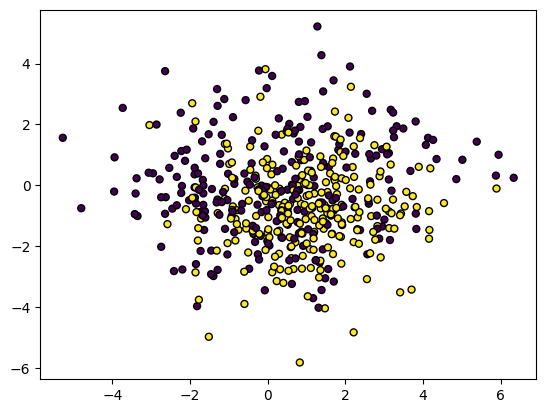

In [11]:
#Exercise:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=500, n_features=10, n_redundant=1, n_informative=7,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')


In [ ]:
#1. load the data (done!)

#2. act like you do EDA (done!)


In [42]:
#3. split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

#4. preprocess - clean (no need), standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [50]:
#5. fit the naive baye algorithm (make it into a class)
    #fit(), predict()
class GNB(object):
    
    def _mean_std(self, X, y, k):
        #create empy mean and std
        n    = X.shape[1]
        mean = np.zeros((k, n))
        std  = np.zeros((k, n))
        
        #for loop, loop each cond
        for label in range(k):
            mean[label, :] = X[y == label].mean(axis=0)
            std[label, :]  = X[y == label].std(axis=0)
        return mean, std
    
    def _gaussian_pdf(self, X_test, mean, std):
        left = 1 / (np.sqrt(2 * np.pi) * std)
        power = (X_test - mean) ** 2 / (2 * (std ** 2))
        right = np.exp(-power)
        return left * right
    
    def _prior(self, y_train):
        cond0 = y_train == 0
        cond1 = y_train == 1
        m0 = len(y_train[cond0])
        m1 = len(y_train[cond1])
        m  = len(y_train)

        prior0 = m0 / m
        prior1 = m1 / m
        
        return prior0, prior1
    
    def __init__(self):
        pass
    
    def fit(self, X_train, y_train):
        k = len(set(y_train))
        self.prior0, self.prior1 = self._prior(y_train)
        self.mean, self.std = self._mean_std(X_train, y_train, k)
        
    def predict(self, X_test):
        pdf0 = self._gaussian_pdf(X_test, self.mean[0,:], self.std[0, :])
        pdf1 = self._gaussian_pdf(X_test, self.mean[1,:], self.std[1, :])
        total_likekyhood0 = np.prod(pdf0, axis=1)
        total_likekyhood1 = np.prod(pdf1, axis=1)   
        posterior0 = total_likekyhood0 * self.prior0
        posterior1 = total_likekyhood1 * self.prior1
        return 1 * (posterior1 > posterior0)

In [52]:
#6. predict with X_test
gnb = GNB()
gnb.fit(X_train, y_train)

yhat = gnb.predict(X_test)


In [57]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, yhat))

print(accuracy_score(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        71
           1       0.85      0.78      0.82        79

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.82      0.81      0.81       150

0.8133333333333334


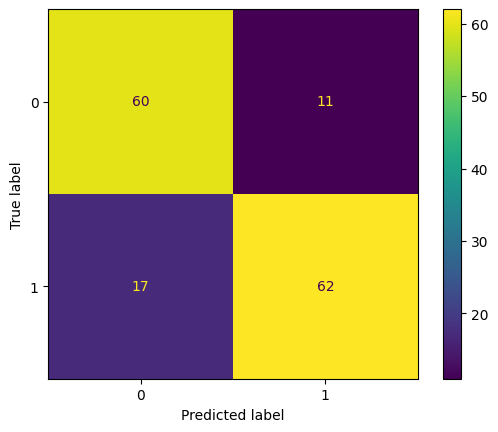

In [58]:
cm = confusion_matrix(y_test, yhat)
cmd = (cm, display_labels=[0,1] )
cmd.plot()